In [94]:
import tensorflow as tf
#import tensorflow_addons as tfa

tf.get_logger().setLevel("CRITICAL") # "CRITICAL"

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [95]:
import autokeras as ak
import pandas as pd
import numpy as np
import os
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#
from sklearn.preprocessing import MinMaxScaler
#
from pretty_confusion_matrix import pp_matrix

In [96]:
# load
pref = ['C4_1_','C4_5_','C4_6_', 'C4_8_', 'C4_10_']
df_d = {}
for i in range(len(pref)):
    fname   = pref[i] + 'rawdata_open.csv'
    #fname   = pref[i] + 'features.csv'
    df_d[i] = pd.read_csv(fname)
#df = pd.read_csv('C4_10_features.csv')
#df_d[4]  

In [97]:
#df = pd.concat(df_d.values(), ignore_index=True)
ii = 4
df = df_d[ii]  

In [113]:
pref[ii]

'C4_10_'

In [98]:
# inspect
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,Class
0,13.574633,0.488296,7.812738,20.996735,18.359935,4.492325,-0.878933,6.152532,12.695700,12.598041,...,-18.750572,3.320414,24.903104,29.004791,21.778008,10.449538,0.195318,2.148503,18.555254,0
1,27.832881,13.769951,-5.957213,-6.933805,1.269570,-6.250191,-23.242897,-23.145238,-5.957213,4.199347,...,-45.899838,-4.297006,58.986175,70.021668,12.109745,-41.895810,-38.184759,-15.723136,-26.172674,0
2,-44.630268,-23.340556,16.406751,21.778008,1.855525,5.078280,25.098422,11.133152,-35.840938,-56.642354,...,25.391400,16.211432,-16.992706,-39.356670,-34.473708,-16.895047,-3.711051,3.027436,6.152532,0
3,4.980621,2.246162,2.148503,1.757866,-2.929777,-6.152532,-3.711051,-7.910398,-27.832881,-42.286447,...,-29.200110,-16.895047,-4.785302,-12.988678,-23.438215,-16.211432,-6.836146,-14.551225,-25.977355,0
4,-21.192053,-10.840175,-12.695700,-16.992706,-8.203375,0.781274,-6.640828,-14.648885,-0.976592,18.359935,...,32.227546,12.012085,-12.500381,-5.664235,23.340556,34.766686,14.160588,-11.035493,-14.258248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,-2.636799,-2.929777,-2.050844,-1.269570,-2.343822,-4.492325,-5.273598,-4.785302,-5.078280,-6.738487,...,-7.519761,-3.613392,1.171911,4.882962,5.371258,1.660207,-4.589984,-9.472945,-11.035493,1
6140,-10.742515,-11.523789,-14.551225,-18.457595,-21.875668,-24.121830,-25.098422,-24.610126,-23.828852,-23.828852,...,-9.668264,-8.203375,-8.105716,-7.617420,-7.715079,-10.156560,-13.574633,-14.844203,-13.379315,1
6141,-11.523789,-11.621448,-13.867611,-16.504410,-17.090365,-15.430158,-13.965270,-15.625477,-18.164617,-16.504410,...,-19.238868,-27.149266,-32.715842,-33.301798,-29.590747,-25.684378,-24.414808,-25.293741,-25.684378,1
6142,-24.512467,-22.754601,-20.606098,-17.676321,-14.160588,-12.012085,-12.305063,-13.672292,-13.769951,-12.891018,...,10.156560,11.328471,11.035493,9.277627,7.519761,7.324442,8.301035,8.594012,7.226783,1


In [99]:
# inspect types 
df.dtypes

x1       float64
x2       float64
x3       float64
x4       float64
x5       float64
          ...   
x97      float64
x98      float64
x99      float64
x100     float64
Class      int64
Length: 101, dtype: object

In [100]:
df.shape[1]

101

In [101]:
X = df.iloc[:,0:df.shape[1] -1].values
#
#scaler = MinMaxScaler()
#X  = scaler.fit_transform(X.T).T
#
y = df.iloc[: , -1:].values

In [102]:
X

array([[ 13.57463301,   0.48829615,   7.81273843, ...,   0.19531846,
          2.14850307,  18.55525376],
       [ 27.83288064,  13.76995148,  -5.95721305, ..., -38.18475906,
        -15.72313608, -26.17267373],
       [-44.63026826, -23.34055605,  16.40675069, ...,  -3.71105075,
          3.02743614,   6.15253151],
       ...,
       [-11.52378918, -11.62144841, -13.86761071, ..., -24.41480758,
        -25.29374065, -25.68437757],
       [-24.51246681, -22.75460067, -20.6060976 , ...,   8.30103458,
          8.59401227,   7.22678304],
       [  5.4689169 ,   4.88296152,   5.37125767, ...,   1.17191076,
          4.58998383,   6.15253151]])

In [103]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [104]:
#
path     = os.getcwd()
folder   = 'results2'
#
if not os.path.exists(path+'/'+folder):
    os.mkdir(path+'/'+folder)

#
l_SEEDS  = list(range(1,100))#[658,847,688,84,535,396]
n_seeds  = 3
#SEED     = 98741
n_trials = 50
l_TUNER    = ["hyperband",'random','greedy','bayesian']#['random','greedy','bayesian']#['random']#

In [107]:
%%time
#for i in range(n_seeds):
while True:
    
    # some hyper parameters
    TUNER = np.random.choice(l_TUNER)
    SEED  = int(np.random.choice(l_SEEDS))
    RS1   = int(np.random.choice(list(range(1,30))))
    #RS2  = int(np.random.choice(l_SEEDS))

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, random_state=RS1, stratify=y)
    
    # regressor
    clf = ak.StructuredDataClassifier(num_classes = 2,overwrite=True, 
                                  max_trials=n_trials, 
                                  objective='val_accuracy', 
                                  seed = SEED, tuner = TUNER)
    
    # fit
    clf.fit(x=X_train, y=y_train, validation_data =(X_test, y_test))
    
    # ak Predict
    y_pred = clf.predict(X_test)
    
    # Results
    # confusion matrix
    cm   = confusion_matrix(y_test, y_pred)
    print(cm)
    #
    print(classification_report(y_test, y_pred))
    cr_d = classification_report(y_test, y_pred, output_dict=True)
    acc  = cr_d['accuracy']
    rc1  = cr_d['1']['recall']
    #
    if cr_d['accuracy'] > 0.9:
        print('Saving model...')
        model = clf.export_model()
        model.summary()
        #mname = "model"+'_r2_'+str(round(reg_results(y_test,y_pred)[0],4))+'_'+TUNER#'.h5'
        mname = 'acc_'+str(round(acc,4))+'_rc1_'+str(round(rc1,4))+'_'+TUNER+'_rs_'+str(RS1)
        try:
            model.save(folder+'/'+mname)#, save_format="tf")
        except Exception:
            model.save(folder+'/'+mname+".h5")
        #model.save(folder+'/'+mname+'.tf') # try .h5 too
        # model
        tf.keras.utils.plot_model(model, to_file=folder+'/'+mname+'/model.png', 
                                  rankdir='TB', 
                                  show_shapes=True, show_layer_names=True, expand_nested=False, dpi=96)    

Trial 50 Complete [00h 00m 50s]
val_accuracy: 0.9796582460403442

Best val_accuracy So Far: 0.981285572052002
Total elapsed time: 01h 07m 12s
39/39 [==============================] - 0s 1ms/step
[[603  11]
 [ 12 603]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       614
           1       0.98      0.98      0.98       615

    accuracy                           0.98      1229
   macro avg       0.98      0.98      0.98      1229
weighted avg       0.98      0.98      0.98      1229



NameError: name 'target_names' is not defined

In [112]:
cr_d = classification_report(y_test, y_pred, output_dict=True)
acc  = cr_d['accuracy']
rc1  = cr_d['1']['recall']
#
if cr_d['accuracy'] > 0.9:
    print('Saving model...')
    model = clf.export_model()
    model.summary()
    #mname = "model"+'_r2_'+str(round(reg_results(y_test,y_pred)[0],4))+'_'+TUNER#'.h5'
    mname = 'acc_'+str(round(acc,4))+'_rc1_'+str(round(rc1,4))+'_'+TUNER+'_rs_'+str(RS1)
    try:
        model.save(folder+'/'+mname)#, save_format="tf")
    except Exception:
        model.save(folder+'/'+mname+".h5")
    #model.save(folder+'/'+mname+'.tf') # try .h5 too
    # model
    tf.keras.utils.plot_model(model, to_file=folder+'/'+mname+'/model.png', 
                              rankdir='TB', 
                              show_shapes=True, show_layer_names=True, expand_nested=False, dpi=96)    

Saving model...
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 100)               0         
_________________________________________________________________
normalization (Normalization (None, 100)               201       
_________________________________________________________________
dense (Dense)                (None, 1024)              103424    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 10

In [69]:
# autoKeras cfg
#l_SEED   = [658,847,688,84,535,396]
#n_seeds  = 1
SEED     = 19
n_trials = 100
TUNER    = "hyperband"#'random'#'greedy'#"'bayesian'#
#
clf = ak.StructuredDataClassifier(num_classes = 2,overwrite=True, 
                                  max_trials=n_trials, 
                                  objective='val_accuracy', 
                                  seed = SEED, tuner = TUNER)


#
l_SEEDS  = list(range(1,100))#[658,847,688,84,535,396]
n_seeds  = 3
#SEED     = 98741
n_trials = 100
l_TUNER    = ["hyperband",'random','greedy','bayesian']#['random','greedy','bayesian']#['random']#

In [70]:
%%time
# fit

#
clf.fit(x=X_train, y=y_train, validation_data =(X_test, y_test))

Trial 100 Complete [00h 00m 05s]
val_accuracy: 0.6126932501792908

Best val_accuracy So Far: 0.7445077300071716
Total elapsed time: 00h 06m 17s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


CPU times: user 7min 15s, sys: 19.4 s, total: 7min 34s
Wall time: 6min 26s


In [36]:
# ak Predict
#
y_pred = clf.predict(X_test)

NotFoundError: ./structured_data_classifier/best_pipeline; No such file or directory

In [53]:
# Results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       615
           1       0.94      0.94      0.94       614

    accuracy                           0.94      1229
   macro avg       0.94      0.94      0.94      1229
weighted avg       0.94      0.94      0.94      1229



In [42]:
# sanity check (accuracy)
print(clf.evaluate(X_test, y_test))
#tpot.score(X_test, y_test)

192/192 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.7414
[0.5256620049476624, 0.7413737177848816]


In [43]:
# confusion matrix
cm  = confusion_matrix(y_test, y_pred)
cm

array([[2362,  710],
       [ 879, 2193]])

In [44]:
from pretty_confusion_matrix import pp_matrix

In [45]:
#pref[ii]

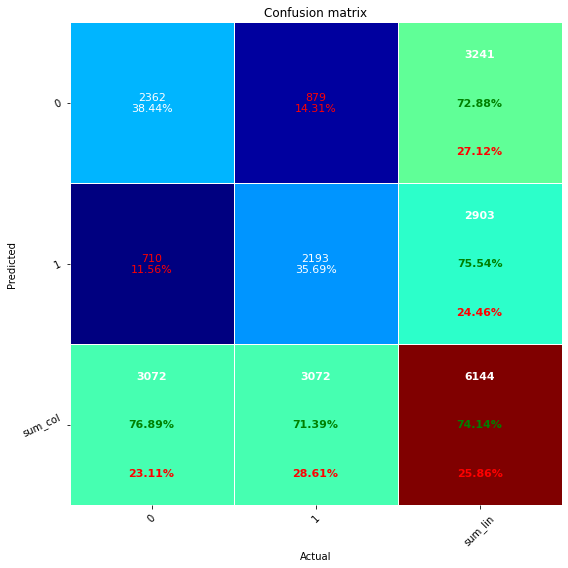

In [46]:
df_cm = pd.DataFrame(cm, range(2), range(2))
cmap  = 'jet'#'spring'#'summer'#'winter'#'RdBu'#'PuRd'#'autumn'#'prism'#
pp_matrix(df_cm, cmap=cmap)

In [153]:
# can we use data from one person to others? vice versa?

In [166]:
# load val
df_val = pd.read_csv('C4_10_features.csv')  
X_val  = df_val.iloc[:,0:df_val.shape[1] -1].values
y_val  = df_val.iloc[: , -1:].values

In [167]:
# sanity check (accuracy)
tpot.score(X_val, y_val)

/home/askery/anaconda3/envs/pycaret+/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.73974609375

In [168]:
y_pred_val = tpot.predict(X_val)

In [169]:
# confusion matrix
cm_val  = confusion_matrix(y_pred_val, y_val)
cm_val

array([[2207,  734],
       [ 865, 2338]])

In [ ]:
df.columns = ['X','y']

In [ ]:
#df = df.replace(" ", "," )
#df

In [ ]:
df.iloc[0]['X']

In [ ]:
df.replace("\n", "" )
#df